### Load packages

In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/home/alejlatorre/udacity/mle-bike-sharing/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Download and unzip from Kaggle

In [2]:
import os
import json
kaggle_username = os.getenv('KAGGLE_USERNAME')
kaggle_key = os.getenv('KAGGLE_KEY')

In [3]:
!kaggle competitions download -c bike-sharing-demand -p ./data --force

100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 422kB/s]
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 421kB/s]


In [4]:
!unzip ./data/bike-sharing-demand.zip -d ./data

Archive:  ./data/bike-sharing-demand.zip
  inflating: ./data/sampleSubmission.csv  
  inflating: ./data/test.csv         
  inflating: ./data/train.csv        


### Load and explore data

In [6]:
filepath = 'data/train.csv'
train = pd.read_csv(filepath, parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
filepath = 'data/test.csv'
test = pd.read_csv(filepath, parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
filepath = 'data/sampleSubmission.csv'
submission = pd.read_csv(filepath, parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


### Train a model using AutoGluon's Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
train.drop(columns=['casual', 'registered'], inplace=True)
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets='best_quality')
predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20231105_173225/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20231105_173225/"
AutoGluon Version:  0.8.2
Python Version:     3.9.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Apr 2 22:23:49 UTC 2021
Disk Space Avail:   190.75 GB / 269.49 GB (70.8%)
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: [

Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4606.35 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('datetime', []) : 1 | ['datetime']
		('float', [])    : 3 | ['temp', 'atemp', 'windspeed']
		('int', [])      : 5 | ['season', 'holiday', 'workingday', 'wea

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.411096      19.004122  435.509553                0.001163           0.386486            3       True         21
1   NeuralNetFastAI_BAG_L2  -51.480771      18.020711  417.922495                0.405119          58.115607            2       True         18
2   RandomForestMSE_BAG_L2  -53.363266      18.078814  373.075824                0.463222          13.268936            2       True         15
3     ExtraTreesMSE_BAG_L2  -54.065332      18.134618  363.738524                0.519026           3.931636            2       True         17
4           XGBoost_BAG_L2  -54.951011      17.771316  369.144449                0.155724           9.337562            2       True         19
5          LightGBM_BAG_L2  -55.332048      17.909830  366.725892         

/home/alejlatorre/udacity/mle-bike-sharing/.venv/lib/python3.9/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

In [19]:
# Ranking
predictor_ranking = pd.DataFrame(predictor.leaderboard(silent=True))
predictor_ranking

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-50.411096,19.004122,435.509553,0.001163,0.386486,3,True,21
1,NeuralNetFastAI_BAG_L2,-51.480771,18.020711,417.922495,0.405119,58.115607,2,True,18
2,RandomForestMSE_BAG_L2,-53.363266,18.078814,373.075824,0.463222,13.268936,2,True,15
3,ExtraTreesMSE_BAG_L2,-54.065332,18.134618,363.738524,0.519026,3.931636,2,True,17
4,XGBoost_BAG_L2,-54.951011,17.771316,369.144449,0.155724,9.337562,2,True,19
5,LightGBM_BAG_L2,-55.332048,17.909830,366.725892,0.294238,6.919005,2,True,14
6,CatBoost_BAG_L2,-55.676961,17.679595,395.174260,0.064003,35.367373,2,True,16
7,LightGBMXT_BAG_L2,-60.168243,22.236624,379.644690,4.621032,19.837803,2,True,13
8,NeuralNetTorch_BAG_L2,-62.220549,18.124155,398.642810,0.508563,38.835923,2,True,20
9,KNeighborsDist_BAG_L1,-84.125061,0.038894,0.021368,0.038894,0.021368,1,True,2


In [12]:
predictions = predictor.predict(test)
predictions.head()

0    25.367199
1    39.823288
2    44.043346
3    47.367096
4    49.837036
Name: count, dtype: float32

In [13]:
submission['count'] = predictions
submission.to_csv('data/submission.csv', index=False)

In [14]:
!kaggle competitions submit -c bike-sharing-demand -f data/submission.csv -m "2023/11/05 submission"

100%|█████████████████████████████████████████| 188k/188k [00:01<00:00, 175kB/s]
Successfully submitted to Bike Sharing Demand

In [15]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                              status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------------  --------  -----------  ------------  
submission.csv               2023-11-05 17:44:40  2023/11/05 submission                    complete  1.76413      1.76413       
submission_new_hpo.csv       2022-05-10 02:20:34  Added new features with hyperparameters  complete  0.5078       0.5078        
submission_new_features.csv  2022-05-10 01:42:04  Added new features                       complete  0.54824      0.54824       
submission.csv               2022-05-10 01:11:32  First raw submission                     complete  1.3981       1.3981        


#### Initial score of `1.76413`

### Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt

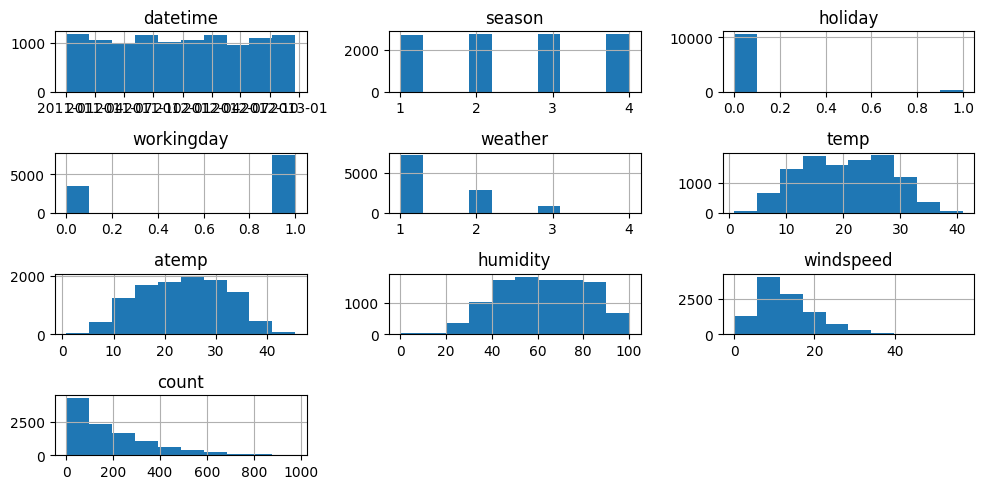

In [28]:
train.hist(figsize=(10, 5))
plt.tight_layout()
plt.show()

In [33]:
train['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

Variation is hourly-based. We will split it into year, month, day and hour to see impact in model performance.

In [34]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [35]:
train['season'] = train['season'].astype('category')
train['weather'] = train['weather'].astype('category')
test['season'] = test['season'].astype('category')
test['weather'] = test['weather'].astype('category')

In [36]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


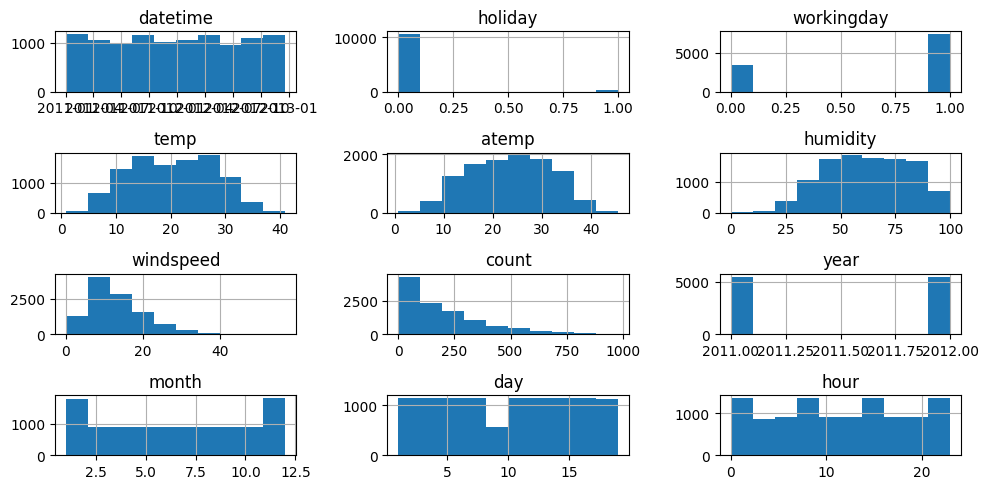

In [37]:
train.hist(figsize=(10, 5))
plt.tight_layout()
plt.show()

In [39]:
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20231105_175652/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20231105_175652/"
AutoGluon Version:  0.8.2
Python Version:     3.9.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Apr 2 22:23:49 UTC 2021
Disk Space Avail:   189.24 GB / 269.49 GB (70.2%)
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: 

In [40]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.415651      26.181501  528.302263                0.001483           1.147565            3       True         18
1   NeuralNetFastAI_BAG_L2  -29.692074      25.359144  427.891434                0.526166          50.126041            2       True         16
2          CatBoost_BAG_L2  -30.432120      24.974504  460.105889                0.141526          82.340496            2       True         14
3          LightGBM_BAG_L2  -30.582377      25.305711  385.963528                0.472732           8.198135            2       True         12
4           XGBoost_BAG_L2  -30.889703      25.039595  386.490027                0.206616           8.724633            2       True         17
5        LightGBMXT_BAG_L2  -31.004094      25.645573  387.899813         

/home/alejlatorre/udacity/mle-bike-sharing/.venv/lib/python3.9/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_pe

In [41]:
# Ranking
new_predictor_ranking = pd.DataFrame(predictor_new_features.leaderboard(silent=True))
new_predictor_ranking

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-29.415651,26.181501,528.302263,0.001483,1.147565,3,True,18
1,NeuralNetFastAI_BAG_L2,-29.692074,25.359144,427.891434,0.526166,50.126041,2,True,16
2,CatBoost_BAG_L2,-30.432120,24.974504,460.105889,0.141526,82.340496,2,True,14
3,LightGBM_BAG_L2,-30.582377,25.305711,385.963528,0.472732,8.198135,2,True,12
4,XGBoost_BAG_L2,-30.889703,25.039595,386.490027,0.206616,8.724633,2,True,17
5,LightGBMXT_BAG_L2,-31.004094,25.645573,387.899813,0.812595,10.134420,2,True,11
6,RandomForestMSE_BAG_L2,-31.531839,25.373032,394.282451,0.540053,16.517058,2,True,13
7,ExtraTreesMSE_BAG_L2,-31.542637,25.325217,381.415139,0.492238,3.649746,2,True,15
8,WeightedEnsemble_L2,-32.018845,23.544278,324.578867,0.000680,0.417976,2,True,10
9,CatBoost_BAG_L1,-33.279223,0.302064,246.073862,0.302064,246.073862,1,True,6


In [42]:
new_predictions = predictor_new_features.predict(test)
new_predictions[new_predictions < 0] = 0

In [43]:
submission_new_features = submission.copy()

In [44]:
submission_new_features["count"] = new_predictions
submission_new_features.to_csv('data/submission_new_features.csv', index=False)

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f data/submission_new_features.csv -m "2023-11-05: added new features"

100%|█████████████████████████████████████████| 188k/188k [00:01<00:00, 101kB/s]
Successfully submitted to Bike Sharing Demand

In [46]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                              status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-11-05 18:15:46  2023-11-05: added new features           complete  0.75622      0.75622       
submission.csv               2023-11-05 17:44:40  2023/11/05 submission                    complete  1.76413      1.76413       
submission_new_hpo.csv       2022-05-10 02:20:34  Added new features with hyperparameters  complete  0.5078       0.5078        
submission_new_features.csv  2022-05-10 01:42:04  Added new features                       complete  0.54824      0.54824       


#### New score of `0.75622`

#### We can see that making EDA show us some potential variables to be created such as day, hour, etc. That helped us to improve the model performance from 1.76413 to 0.75622

### Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [47]:
import autogluon.core as ag

hp_tune = True
nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [48]:
predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=train, 
    time_limit=600,
    presets='best_quality', 
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20231105_182156/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20231105_182156/"
AutoGluon Version:  0.8.2
Python Version:     3.9.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Apr 2 22:23:49 UTC 2021
Disk Space Avail:   187.84 GB / 269.49 GB (69.7%)
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: 

In [49]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -35.752184      10.044382  270.692637                0.000740           0.281363            3       True         12
1    LightGBM_BAG_L2/T3  -35.796328       9.431936  241.762705                0.813442          28.602755            2       True          9
2    LightGBM_BAG_L2/T2  -35.998783       9.230201  241.808519                0.611707          28.648569            2       True          8
3    LightGBM_BAG_L2/T1  -36.002023       9.396117  240.517333                0.777622          27.357383            2       True          7
4    LightGBM_BAG_L2/T5  -36.539764       9.296119  241.804999                0.677624          28.645048            2       True         11
5   WeightedEnsemble_L2  -37.414199       3.940877   87.415462                0.000598      

/home/alejlatorre/udacity/mle-bike-sharing/.venv/lib/python3.9/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -39.51882011446343,
  'LightGBM_BAG_L1/T2': -38.37085974878163,
  'LightGBM_BAG_L1/T3': -37.583050561975575,
  'LightGBM_BAG_L1/T4': -122.02233894516888,
  'LightGBM_BAG_L1/T5': -42.634002165667056,
  'WeightedEnsemble_L2': -37.41419854118846,
  'LightGBM_BAG_L2/T1': -36.00202327274889,
  'LightGBM_BAG_L2/T2': -35.998

In [51]:
# Ranking
hpo_predictor_ranking = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
hpo_predictor_ranking

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-35.752184,10.044382,270.692637,0.000740,0.281363,3,True,12
1,LightGBM_BAG_L2/T3,-35.796328,9.431936,241.762705,0.813442,28.602755,2,True,9
2,LightGBM_BAG_L2/T2,-35.998783,9.230201,241.808519,0.611707,28.648569,2,True,8
3,LightGBM_BAG_L2/T1,-36.002023,9.396117,240.517333,0.777622,27.357383,2,True,7
4,LightGBM_BAG_L2/T5,-36.539764,9.296119,241.804999,0.677624,28.645048,2,True,11
5,WeightedEnsemble_L2,-37.414199,3.940877,87.415462,0.000598,0.297996,2,True,6
6,LightGBM_BAG_L1/T3,-37.583051,2.162280,45.420961,2.162280,45.420961,1,True,3
7,LightGBM_BAG_L1/T2,-38.370860,1.777999,41.696505,1.777999,41.696505,1,True,2
8,LightGBM_BAG_L1/T1,-39.518820,1.591508,41.527472,1.591508,41.527472,1,True,1
9,LightGBM_BAG_L1/T5,-42.634002,1.450518,43.279763,1.450518,43.279763,1,True,5


In [52]:
predictions_new_hpo = predictor_new_hpo.predict(test)

In [53]:
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [54]:
submission_new_hpo = submission_new_features.copy()
submission_new_hpo['count'] = predictions_new_hpo
submission_new_hpo.to_csv('data/submission_new_hpo.csv', index=False)

In [55]:
!kaggle competitions submit -c bike-sharing-demand -f data/submission_new_hpo.csv -m "2023-11-05: added new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:01<00:00, 191kB/s]
Successfully submitted to Bike Sharing Demand

In [56]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                          status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-11-05 18:33:35  2023-11-05: added new features with hyperparameters  complete  0.47825      0.47825       
submission_new_features.csv  2023-11-05 18:15:46  2023-11-05: added new features                       complete  0.75622      0.75622       
submission.csv               2023-11-05 17:44:40  2023/11/05 submission                                complete  1.76413      1.76413       
submission_new_hpo.csv       2022-05-10 02:20:34  Added new features with hyperparameters              complete  0.5078       0.5078        


#### New score of `0.47825`

### Write a report

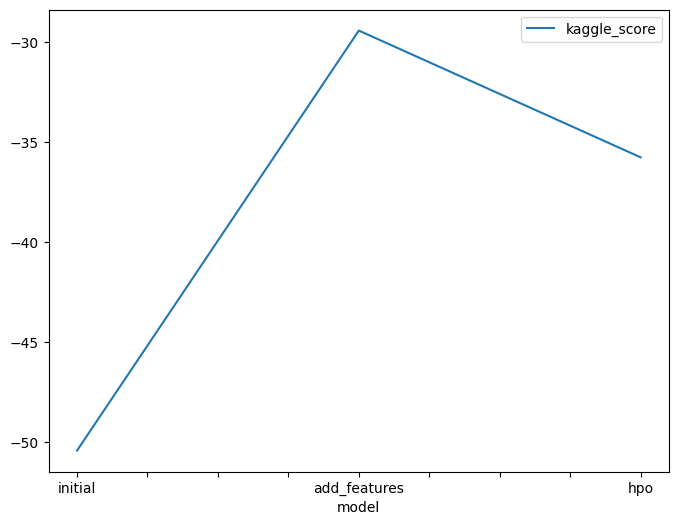

In [71]:
fig = pd.DataFrame(
    {
        'model': ['initial', 'add_features', 'hpo'],
        'kaggle_score': [-50.411096, -29.415651, -35.752184]
    }
).plot(x='model', y='kaggle_score', figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

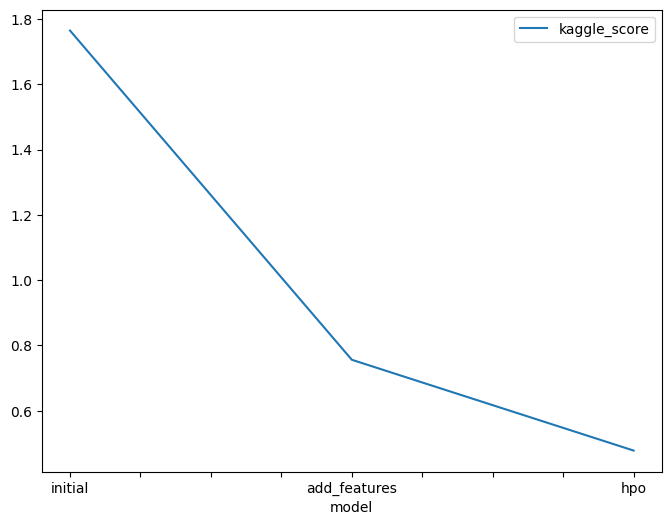

In [59]:
fig = pd.DataFrame(
    {
        'model': ['initial', 'add_features', 'hpo'],
        'kaggle_score': [1.76413, 0.75622, 0.47825]
    }
).plot(x='model', y='kaggle_score', figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

In [60]:
cols = ['model', 'score_val', 'child_hyperparameters']
lb_predictor = predictor.leaderboard(extra_info='hyperparameters')[cols]
lb_predictor_new_features = predictor_new_features.leaderboard(extra_info='hyperparameters')[cols]
lb_predictor_new_hpo = predictor_new_hpo.leaderboard(extra_info='hyperparameters')[cols]

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order  num_features  num_models  num_models_w_ancestors  memory_size  memory_size_w_ancestors  memory_size_min  memory_size_min_w_ancestors  num_ancestors  num_descendants             model_type             child_model_type                                                                                                                   hyperparameters hyperparameters_fit                                                                                                                                                                                                                                                                                                                                                                          ag_args_fit  \
0      WeightedEnsemble_L3  -50.411096      19.004122  435.509553                0.001163           0.386486    

In [61]:
lb_predictor.head()

,model,score_val,child_hyperparameters
0,WeightedEnsemble_L3,-50.411096,{'ensemble_size': 100}
1,NeuralNetFastAI_BAG_L2,-51.480771,"{'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 'auto', 'lr': 0.01, 'epochs': 'auto', 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}"
2,RandomForestMSE_BAG_L2,-53.363266,"{'n_estimators': 300, 'max_leaf_nodes': 15000, 'n_jobs': -1, 'random_state': 0, 'bootstrap': True, 'criterion': 'squared_error'}"
3,ExtraTreesMSE_BAG_L2,-54.065332,"{'n_estimators': 300, 'max_leaf_nodes': 15000, 'n_jobs': -1, 'random_state': 0, 'bootstrap': True, 'criterion': 'squared_error'}"
4,XGBoost_BAG_L2,-54.951011,"{'n_estimators': 10000, 'learning_rate': 0.1, 'n_jobs': -1, 'proc.max_category_levels': 100, 'objective': 'reg:squarederror', 'booster': 'gbtree'}"


In [62]:
lb_predictor_new_features.head()

,model,score_val,child_hyperparameters
0,WeightedEnsemble_L3,-29.415651,{'ensemble_size': 100}
1,NeuralNetFastAI_BAG_L2,-29.692074,"{'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 'auto', 'lr': 0.01, 'epochs': 'auto', 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}"
2,CatBoost_BAG_L2,-30.432120,"{'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'RMSE'}"
3,LightGBM_BAG_L2,-30.582377,{'learning_rate': 0.05}
4,XGBoost_BAG_L2,-30.889703,"{'n_estimators': 10000, 'learning_rate': 0.1, 'n_jobs': -1, 'proc.max_category_levels': 100, 'objective': 'reg:squarederror', 'booster': 'gbtree'}"


In [63]:
lb_predictor_new_hpo.head()

,model,score_val,child_hyperparameters
0,WeightedEnsemble_L3,-35.752184,{'ensemble_size': 100}
1,LightGBM_BAG_L2/T3,-35.796328,"{'learning_rate': 0.04988344687833528, 'num_boost_round': 100, 'num_leaves': 62, 'feature_fraction': 0.9618129346960314, 'min_data_in_leaf': 52}"
2,LightGBM_BAG_L2/T2,-35.998783,"{'learning_rate': 0.06994332504138304, 'num_boost_round': 100, 'num_leaves': 29, 'feature_fraction': 0.8872033759818312, 'min_data_in_leaf': 5}"
3,LightGBM_BAG_L2/T1,-36.002023,"{'learning_rate': 0.05, 'num_boost_round': 100, 'num_leaves': 36, 'feature_fraction': 1.0, 'min_data_in_leaf': 20}"
4,LightGBM_BAG_L2/T5,-36.539764,"{'learning_rate': 0.03517964032104083, 'num_boost_round': 100, 'num_leaves': 43, 'feature_fraction': 0.9479312595206661, 'min_data_in_leaf': 26}"


In [67]:
pd.DataFrame({
    'submission': ['initial', 'add_features', 'hpo'],
    'model': [lb_predictor['model'][0], lb_predictor_new_features['model'][0], lb_predictor_new_hpo['model'][0]],
    'hyperparameters': [lb_predictor['child_hyperparameters'][0], lb_predictor_new_features['child_hyperparameters'][0], lb_predictor_new_hpo['child_hyperparameters'][0]],
    'kaggle_score': [1.76413, 0.75622, 0.47825],
})

,submission,model,hyperparameters,kaggle_score
0,initial,WeightedEnsemble_L3,{'ensemble_size': 100},1.76413
1,add_features,WeightedEnsemble_L3,{'ensemble_size': 100},0.75622
2,hpo,WeightedEnsemble_L3,{'ensemble_size': 100},0.47825


#### As we see, the best score is achieved by the model with added features (without hyperparameters optimization). The score is 0.47825. Anyways, the model with HPO has improved vs baseline and added features because we iterated over many hyperparameter values looking for the best combination.